In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
from tensorflow import keras

In [6]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [11]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [12]:
x = df.drop(columns = ['species'])
y = df['species']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, shuffle=True, random_state=69)

In [14]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [15]:
y_train = keras.utils.to_categorical(y_train, num_classes = 3)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [17]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3,activation='softmax'))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100
4/4 - 1s - 284ms/step - accuracy: 0.3143 - loss: 1.1469
Epoch 2/100
4/4 - 0s - 14ms/step - accuracy: 0.3524 - loss: 1.1285
Epoch 3/100
4/4 - 0s - 12ms/step - accuracy: 0.4095 - loss: 1.0812
Epoch 4/100
4/4 - 0s - 15ms/step - accuracy: 0.5714 - loss: 0.9662
Epoch 5/100
4/4 - 0s - 12ms/step - accuracy: 0.5524 - loss: 0.9615
Epoch 6/100
4/4 - 0s - 13ms/step - accuracy: 0.5619 - loss: 0.9578
Epoch 7/100
4/4 - 0s - 9ms/step - accuracy: 0.5810 - loss: 0.9273
Epoch 8/100
4/4 - 0s - 10ms/step - accuracy: 0.6857 - loss: 0.8541
Epoch 9/100
4/4 - 0s - 10ms/step - accuracy: 0.6476 - loss: 0.8853
Epoch 10/100
4/4 - 0s - 11ms/step - accuracy: 0.7333 - loss: 0.8154
Epoch 11/100
4/4 - 0s - 11ms/step - accuracy: 0.6571 - loss: 0.7965
Epoch 12/100
4/4 - 0s - 11ms/step - accuracy: 0.6667 - loss: 0.8033
Epoch 13/100
4/4 - 0s - 9ms/step - accuracy: 0.7714 - loss: 0.7526
Epoch 14/100
4/4 - 0s - 10ms/step - accuracy: 0.7619 - loss: 0.7050
Epoch 15/100
4/4 - 0s - 10ms/step - accuracy: 0.8286 - los

In [20]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step 
[[9.9954093e-01 4.4904204e-04 1.0023354e-05]
 [9.4161369e-03 9.0971661e-01 8.0867276e-02]
 [9.9813062e-01 1.8351052e-03 3.4228051e-05]
 [1.5406670e-04 4.8309404e-02 9.5153654e-01]
 [9.9808723e-01 1.8636270e-03 4.9141505e-05]]


In [21]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [22]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: species, dtype: int32


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,prediction))

0.9777777777777777


In [24]:
cm = confusion_matrix(y_test,prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

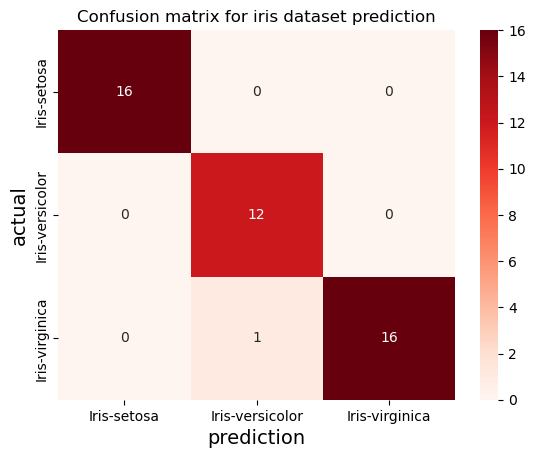

In [25]:
map = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
map.set_title('Confusion matrix for iris dataset prediction')
map.set_xlabel('prediction', fontsize=14)
map.set_ylabel('actual', fontsize=14)

In [51]:
import pickle

with open('iris_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the scaler as well (if you're scaling the inputs)
with open('iris_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scale, scaler_file)